In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headers = ["datetime", "temperature", "humidity", 
           "precipitation", "windspeed", "winddirection", 
           "cloudcover", "pressure", "dewpoint",
          "month", "hour", "season", "day_night",
          "location_id"]
climate_df = pd.read_csv("data/processed/hcm_weather_processed.csv", header=0, names=headers)
climate_df

,datetime,temperature,humidity,precipitation,windspeed,winddirection,cloudcover,pressure,dewpoint,month,hour,season,day_night,location_id
0,2024-01-01 00:00:00,25.6,88,0.0,5.7,145,99,1011.5,23.4,1,0,Dry,Night,5
1,2024-01-01 01:00:00,25.3,90,0.0,3.6,143,96,1011.2,23.5,1,1,Dry,Night,5
2,2024-01-01 02:00:00,25.3,88,0.0,0.5,135,96,1010.7,23.2,1,2,Dry,Night,5
3,2024-01-01 03:00:00,24.9,91,0.0,4.7,9,98,1010.5,23.3,1,3,Dry,Night,5
4,2024-01-01 04:00:00,24.6,92,0.0,8.0,352,100,1010.4,23.2,1,4,Dry,Night,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128443,2025-10-30 19:00:00,26.9,90,0.0,2.7,4,100,1009.5,25.1,10,19,Rainy,Night,4
128444,2025-10-30 20:00:00,27.0,89,0.2,0.6,18,97,1010.5,25.1,10,20,Rainy,Night,4
128445,2025-10-30 21:00:00,26.3,93,0.2,6.5,104,85,1011.4,25.0,10,21,Rainy,Night,4
128446,2025-10-30 22:00:00,25.6,94,0.0,6.5,32,77,1011.6,24.7,10,22,Rainy,Night,4


### Lượng mưa thay đổi theo mùa, theo khu vực và theo thời gian trong ngày như thế nào?

#### Từng yếu tố

**1. Khác biệt về lượng mưa giữa mùa khô và mùa mưa**

/tmp/ipykernel_93191/2713382800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=climate_df, x="season", y="precipitation", palette="Set2")


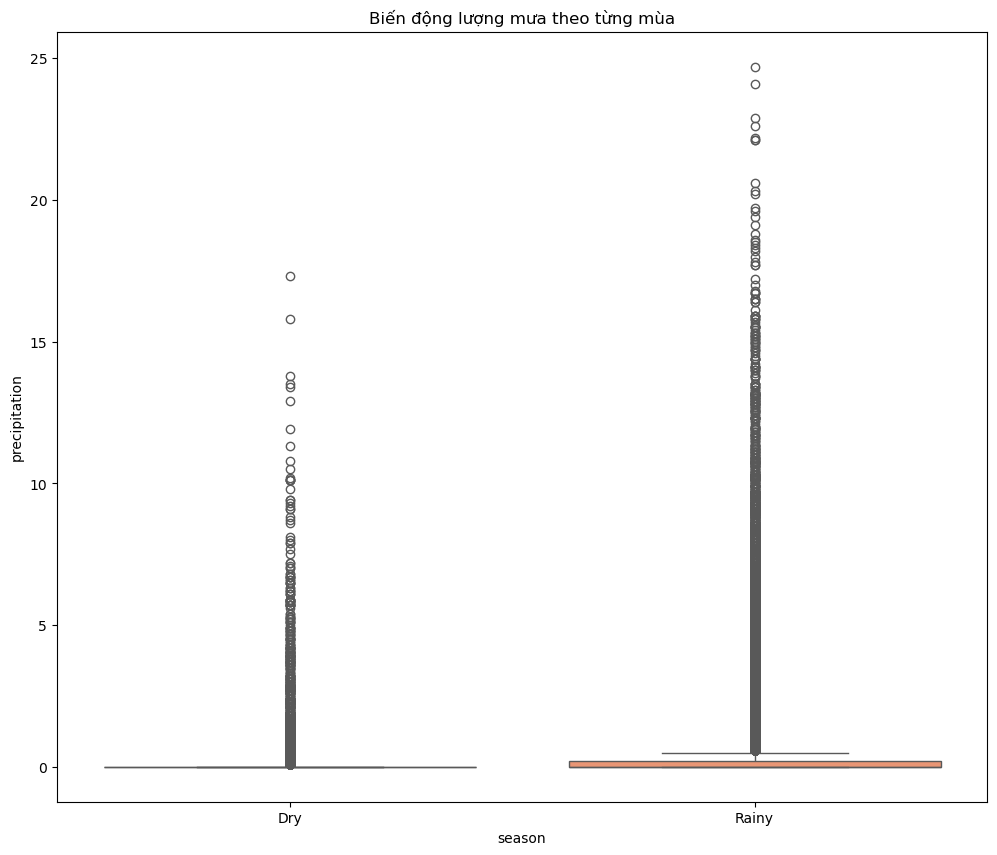

In [3]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=climate_df, x="season", y="precipitation", palette="Set2")

plt.title("Biến động lượng mưa theo từng mùa")
plt.show()

Nhận xét:
- Lượng mưa giữa 2 mùa có sự tương phản rõ rệt, trong đó mùa mưa có lượng mưa lớn hơn đáng kể.
- Ở cả 2 mùa, lượng mưa đều có phân bố không đều mà mà thường dồn vào một thời điểm.

**2. Khu vực**

/tmp/ipykernel_93191/2573203521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=climate_df, x="location_id", y="precipitation", palette="Set2")


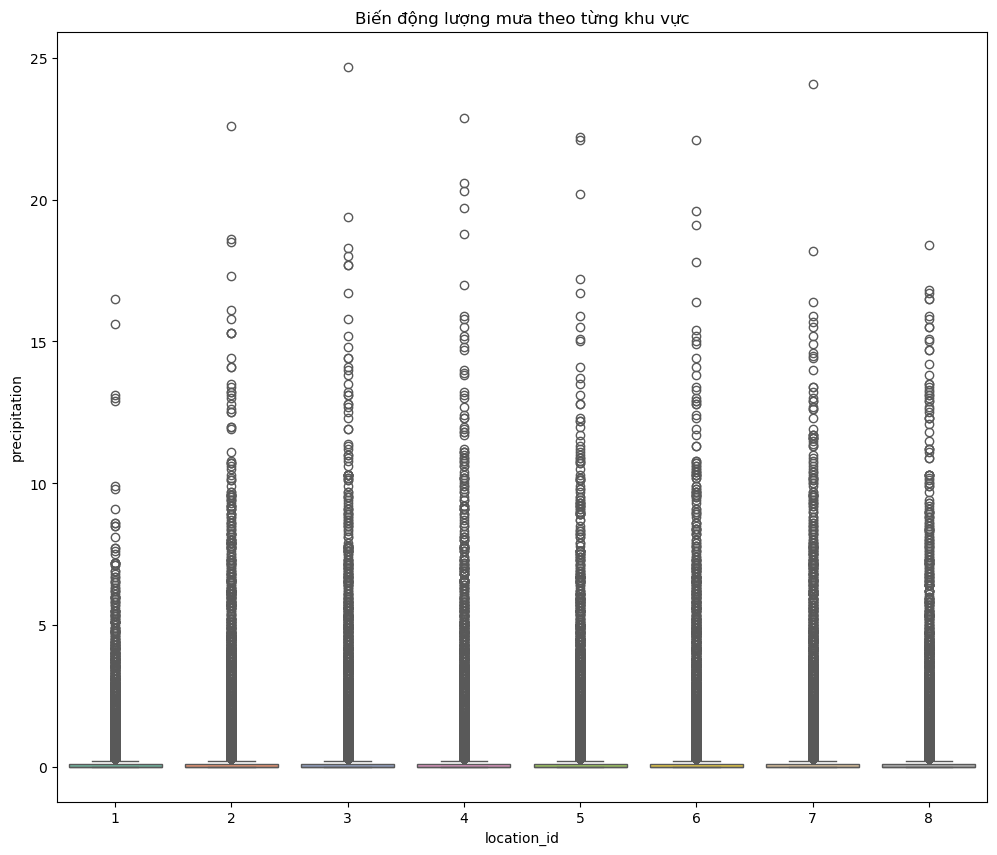

In [4]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=climate_df, x="location_id", y="precipitation", palette="Set2")

plt.title("Biến động lượng mưa theo từng khu vực")
plt.show()

In [5]:
climate_df.groupby("location_id")['precipitation'].describe()

,count,mean,std,min,25%,50%,75%,max
location_id,,,,,,,,
1,16056.0,0.200380,0.714125,0.0,0.0,0.0,0.1,16.5
2,16056.0,0.297527,1.142483,0.0,0.0,0.0,0.1,22.6
3,16056.0,0.288378,1.151052,0.0,0.0,0.0,0.1,24.7
4,16056.0,0.271842,1.124621,0.0,0.0,0.0,0.1,22.9
5,16056.0,0.273132,1.099687,0.0,0.0,0.0,0.1,22.2
6,16056.0,0.283066,1.128191,0.0,0.0,0.0,0.1,22.1
7,16056.0,0.304291,1.181231,0.0,0.0,0.0,0.1,24.1
8,16056.0,0.276763,1.117012,0.0,0.0,0.0,0.1,18.4


Nhận xét:
- Lượng mưa giữa các khu vực có phân bố tương đối đồng đều. Gần như không có sự khác biệt đáng kể.

**3. Thời điểm trong ngày**

Vì dữ liệu phân bố theo hourly, ta xét cả dataset `climate_df` (tất cả giờ).

In [6]:
climate_df['hour'] = pd.to_datetime(climate_df['datetime']).dt.hour

/tmp/ipykernel_93191/1232339040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=climate_df, x="hour", y="precipitation", palette="Set2")


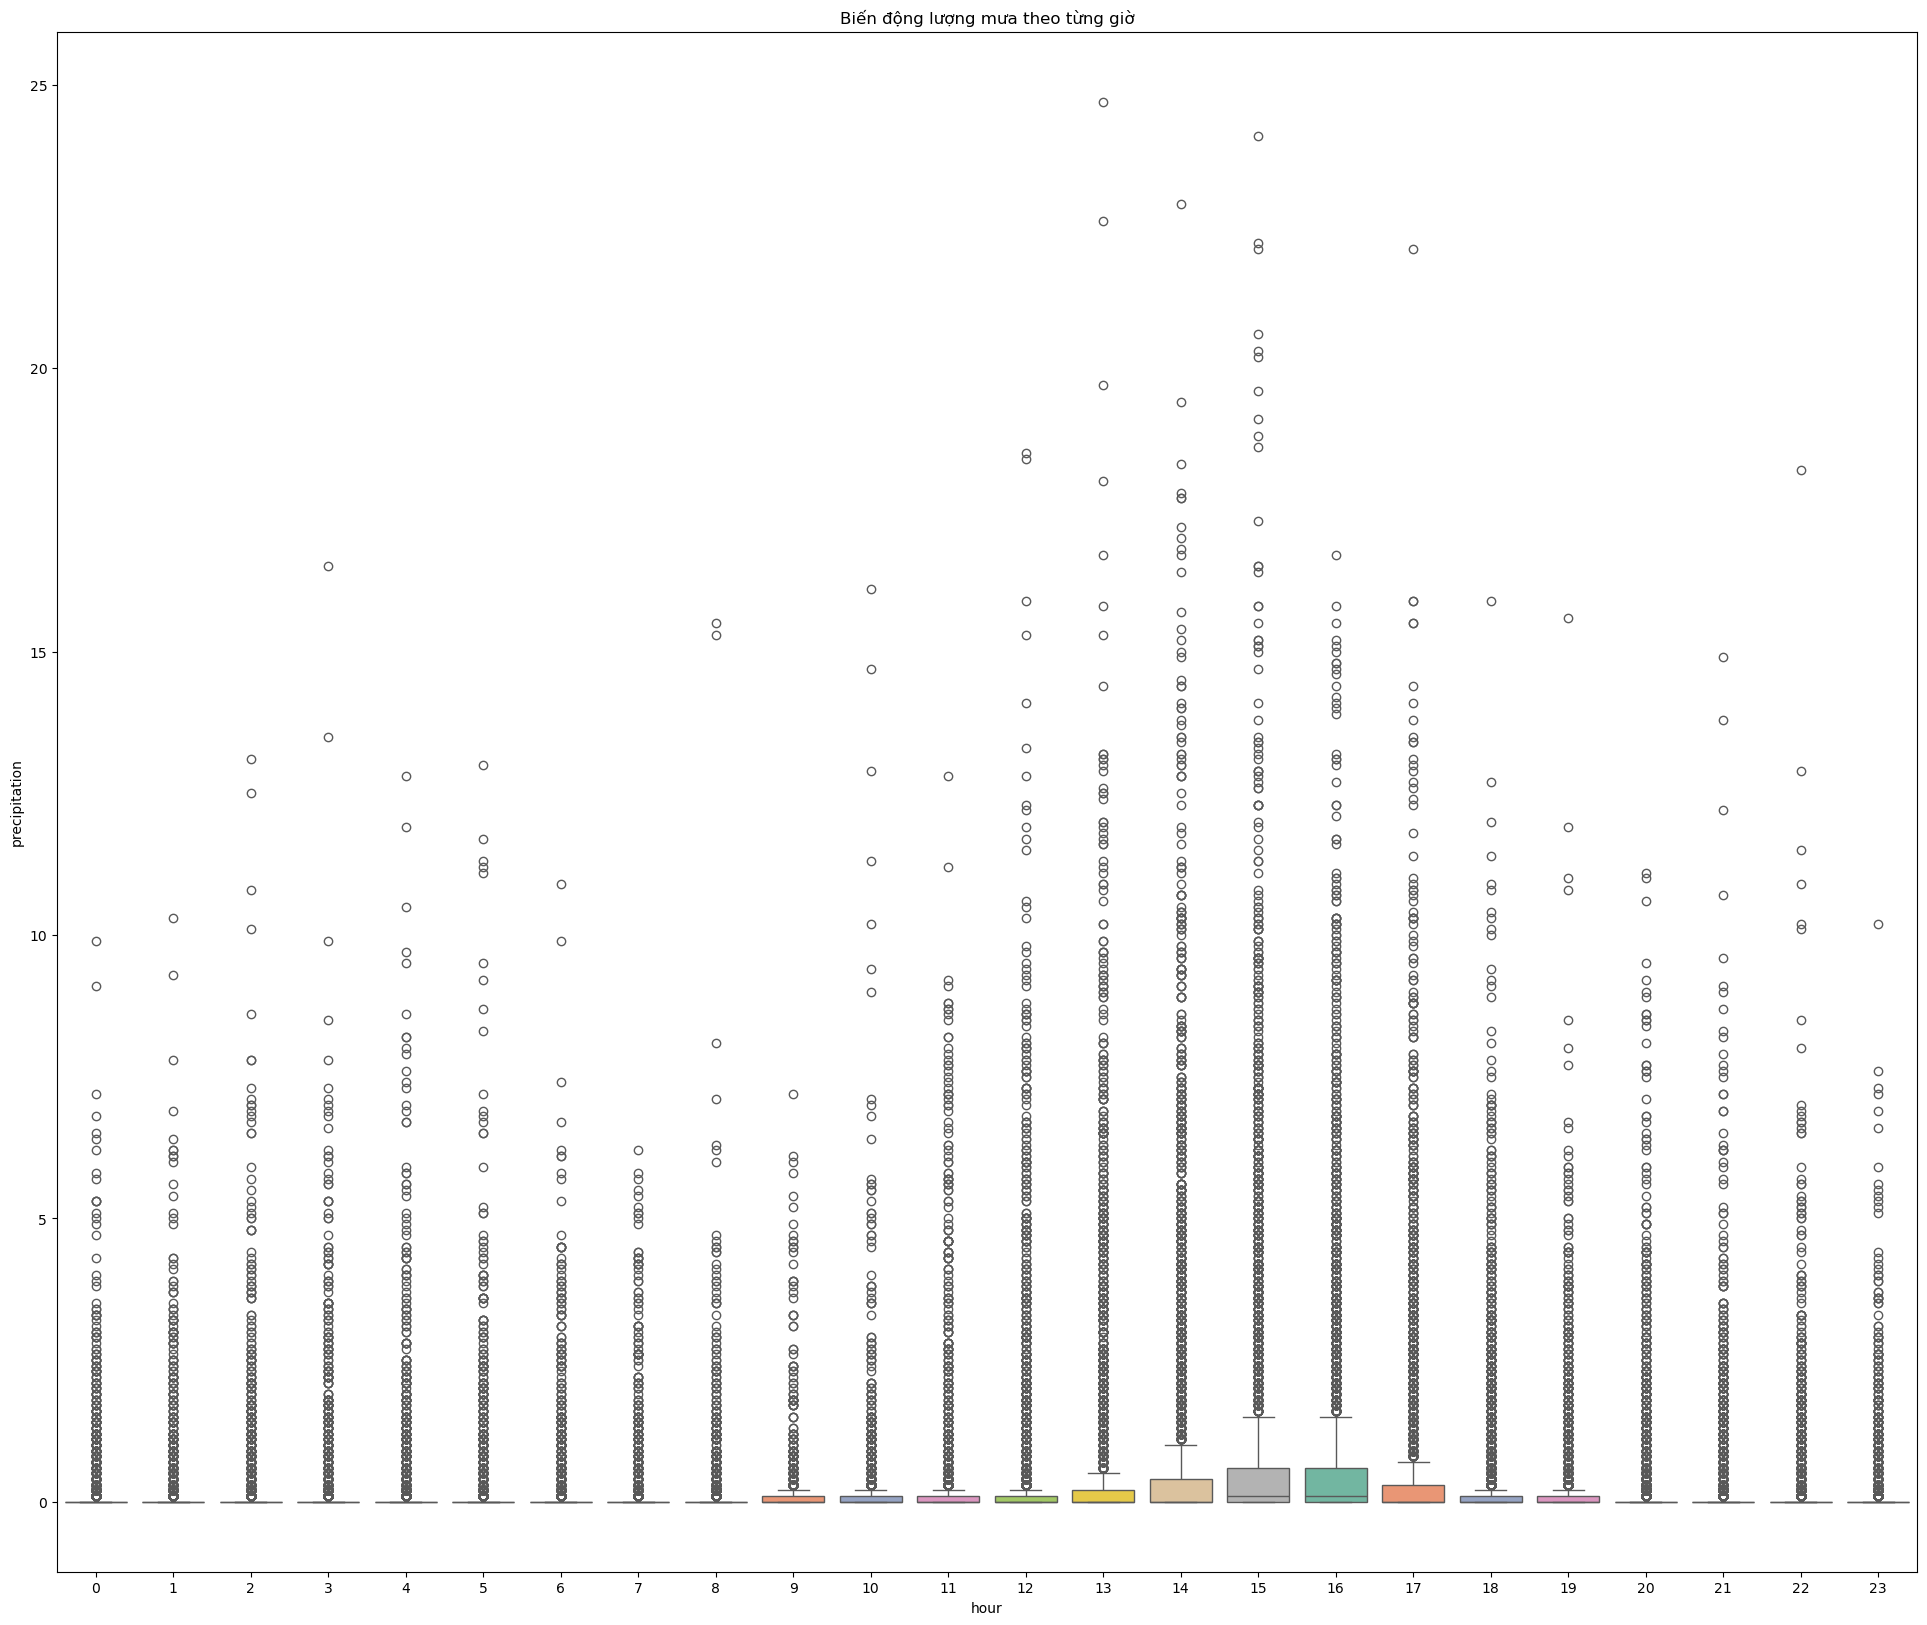

In [8]:
plt.figure(figsize=(24, 20))
sns.boxplot(data=climate_df, x="hour", y="precipitation", palette="Set2")

plt.title("Biến động lượng mưa theo từng giờ")
plt.show()

Nhận xét:
- Lượng mưa được phân bố không đều, sáng (0-8 giờ) thường không mưa, trong khi chiều (14-17 giờ) thường có lượng mưa lớn nhất trong ngày.

> Nhìn chung, các địa điểm được xét có đại đa số thời gian là không mưa. Dẫn đến boxplot có phần box bị bẹp.

#### II. Kết hợp các yếu tố

**Ở mỗi khu vực cụ thể, phân bố mưa theo giờ như thế nào?**

In [9]:
heatmap_data = climate_df.pivot_table(
    index='location_id',  # Thay 'station_name' bằng tên cột khu vực của bạn
    columns='hour',        # Các cột là giờ từ 0-23
    values='precipitation',# Giá trị để tô màu
    aggfunc='mean'         # 'mean': Lượng mưa TB, 'sum': Tổng lượng mưa
)

<Axes: xlabel='hour', ylabel='location_id'>

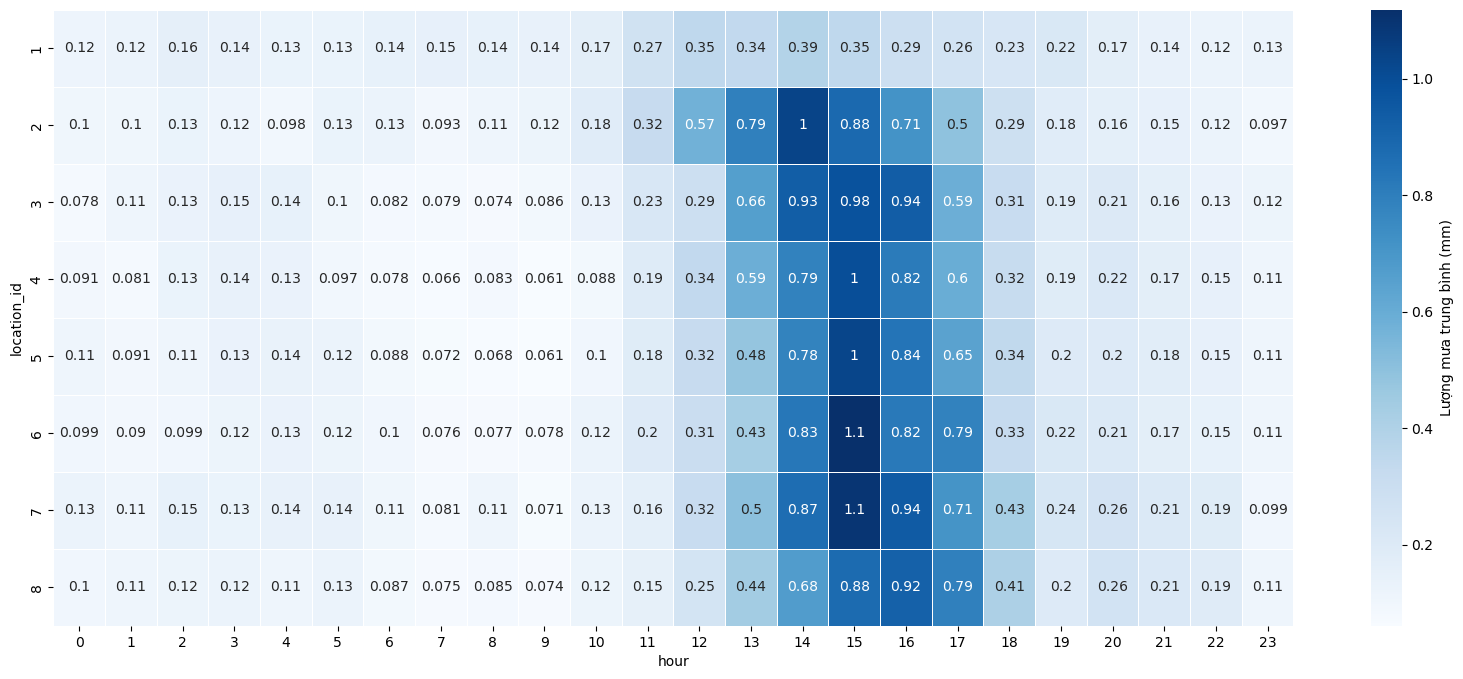

In [10]:
plt.figure(figsize=(20, 8)) # Chỉnh chiều ngang rộng ra cho dễ nhìn giờ

sns.heatmap(
    heatmap_data,
    cmap='Blues',      # Màu xanh dương (đậm là mưa to)
    annot=True,       # Không hiện số (vì nhiều ô quá sẽ rối), đổi thành True nếu ít trạm
    linewidths=0.5,    # Kẻ viền trắng giữa các ô
    cbar_kws={'label': 'Lượng mưa trung bình (mm)'} # Chú thích thanh màu
)

Nhận xét:
- Ở tất cả khu vực, khoảng thời gian có lượng mưa lớn nhất đều tập trung vào 13-17h.
- Trong đó:
    - Khu vực 1 có lượng mưa tương nhau ở các khung giờ với khác biệt không quá lớn.
    - Các khu vực còn lại có lượng mưa khác biệt đáng kể giữa khung 13-17h so với các thời điểm khác.

**Khu vực nào mưa nhiều/lâu nhất**

**Lưu lượng mưa**  

<Axes: xlabel='location_id', ylabel='precipitation'>

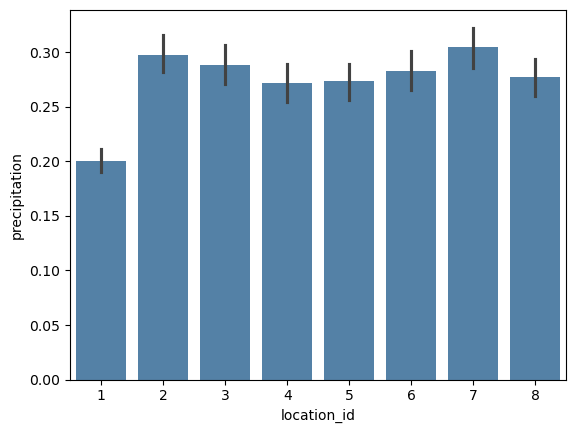

In [11]:
sns.barplot(
    data=climate_df,
    x='location_id',
    y='precipitation',
    color='#4682B4'
)

Nhận xét:
- Khu vực 2 và 7 có lượng mưa trunng bình lớn nhất (bất kể có sai số hay không).
- Khu vực 1 có lượng mưa tương đối khiêm tốn so với phần còn lại.

**Thời gian mưa**


In [12]:
rain_df = climate_df[climate_df['precipitation'] > 0].copy()
rain_df['datetime'] = pd.to_datetime(rain_df['datetime'])
time_diff = rain_df.groupby("location_id")["datetime"].diff()
rain_df['is_break'] = time_diff != pd.Timedelta('1h')
sub_group_id = rain_df.groupby('location_id')['is_break'].cumsum()
rain_df['rain_length'] = rain_df.groupby(['location_id', sub_group_id]).cumcount() + 1

Text(0.5, 1.0, 'Thời gian mưa trung bình trong năm của từng khu vực')

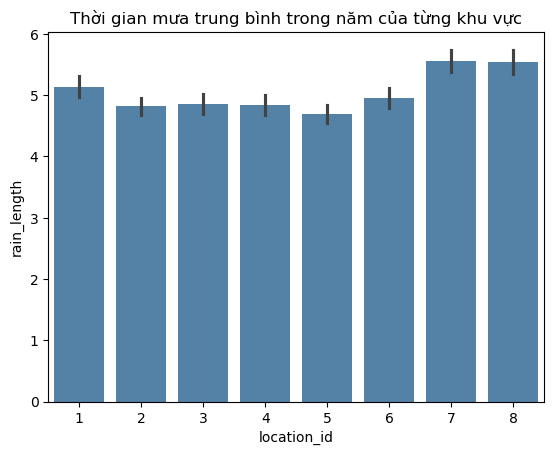

In [25]:
sns.barplot(
    data=rain_df,
    x='location_id',
    y='rain_length',
    color='#4682B4'
)

plt.title("Thời gian mưa trung bình trong năm của từng khu vực")

Text(0.5, 1.0, 'Thời gian mưa cao nhất của từng khu vực')

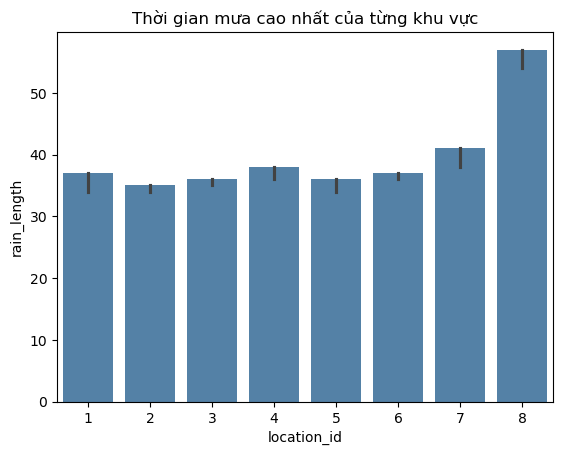

In [26]:
sns.barplot(
    data=rain_df,
    x='location_id',
    y='rain_length',
    estimator=max,
    color='#4682B4'
)

plt.title("Thời gian mưa cao nhất của từng khu vực")

Nhận xét:
- Độ dài những cơn mưa ở mỗi khu vực không khác biệt nhau quá rõ rệt. Tuy nhiên, vẫn có thể chỉ ra rằng khu vực 7 và 8 có độ dài trung bình những cơn mưa cao nhất.
- Với độ dài tối đa, khu vực 8 lại chỉ ra sự khác biệt rõ rệt với độ dài là 57 giờ.

**Vùng mưa di chuyển như nào trong ngày**

**Quy luật về thời điểm mưa trong ngày có thay đổi theo mùa không ?**

<Axes: xlabel='hour', ylabel='precipitation'>

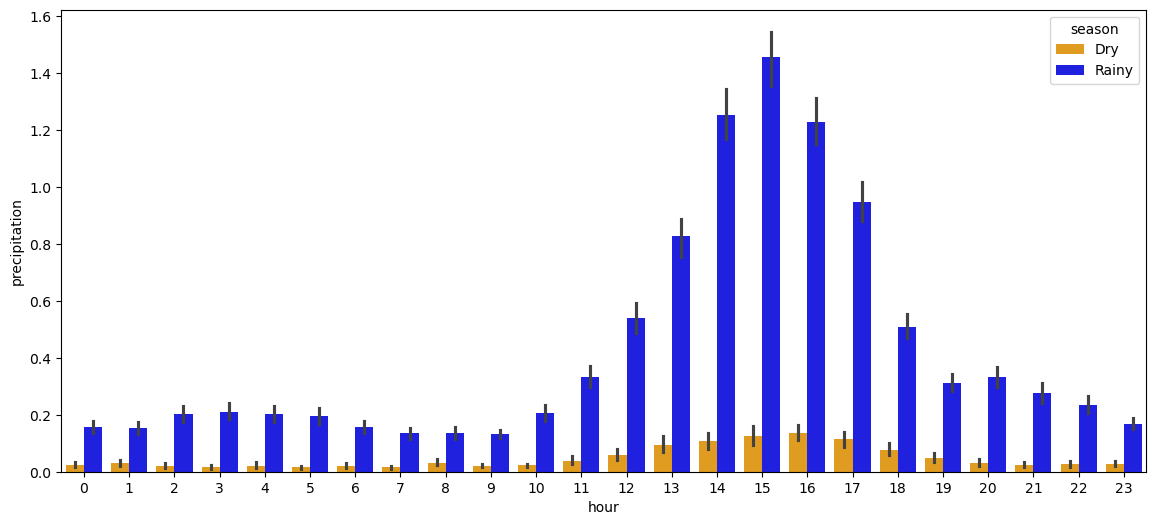

In [29]:
plt.figure(figsize=(14, 6))

sns.barplot(
    data=climate_df, 
    x='hour', 
    y='precipitation',
    hue='season',
    palette=['orange', 'blue']
)

Nhận xét:
- Phân bổ về thời điểm và lượng mưa của mỗi giờ theo mùa gần nhưng không thay đổi.  
Theo đó, khoảng thời gian có lượng mưa trung bình lớn nhất ở cả 2 mùa đều là 13-17h, các thời điểm còn lại có lượng mưa không khác biệt nhau quá nhiều.

##  I. Những nguyên nhân nào gây ra mưa

**3. Điểm chung của những thời điểm mưa/không mưa là gì ?**
